<a href="https://colab.research.google.com/github/aydawudu/GCP/blob/main/EDA_fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Load Dataset

In [3]:
df_fuel=pd.read_csv("/content/Fuel.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_fuel.head()

Flight     Tail DepCity ArrCity  Altitude2  ACT_TXO_MIN  ACT_TXI_MIN  \
0  4308.0  27200.0     IAH     ECP      370.0         49.0          3.0   
1  4867.0  16149.0     IAH     BTR       30.0         15.0          4.0   
2  4322.0  14198.0     IAD     DTW      260.0         18.0          8.0   
3  4915.0  11191.0     LIT     IAH      280.0         30.0         13.0   
4  4243.0  14148.0     LFT     IAH      260.0         78.0          7.0   

   Actual Block Minutes  Column1  Crew Extra   ...  Actual-Planned Fuel  \
0                 143.0      NaN          NaN  ...               -667.0   
1                  60.0      NaN          NaN  ...                  0.0   
2                  87.0      NaN        300.0  ...               -300.0   
3                 126.0      NaN          NaN  ...               -752.0   
4                 148.0      NaN          NaN  ...               -657.0   

   Actual-Planned Burn  Minutes  Zero Fuel Weight   MINTO  Unnamed: 34  \
0               3453.0    155.0           38915.0  5590.0          NaN   
1                269.0     86.0           40428.0  4903.0          NaN   
2                266.0     79.0           40249.0  5922.0          NaN   
3                710.0    102.0           39665.0  7126.0          NaN   
4                -63.0     99.0           39384.0  6100.0          NaN   

   Unnamed: 35  Unnamed: 36  Unnamed: 37  Unnamed: 38  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 39 columns]

let's check the null values

In [5]:
df_fuel.isnull().sum()

Flight                            13354
Tail                              13354
DepCity                           13354
ArrCity                           13354
Altitude2                         13368
ACT_TXO_MIN                       13404
ACT_TXI_MIN                       13396
Actual Block Minutes              13407
Column1                           20614
Crew Extra                        18691
ENRTE WX DEV                      18693
ATC SWAP CDR                      19803
ECON TANKER                       19710
MISS APP                          13367
Holding Fuel (PPS)                13367
Dispatch Extra                    17918
Planned Departure Fuel            13366
Actual Departure Fuel             13440
Actual-Planned Departure Fuel     13353
Planned Arrival Fuel              13366
Planned Arrival Fuel No Tanker    13353
Crew Request/Tanker               13354
Actual Arrival Fuel               13661
REMF                              13354
Planned Fuel Burn                 13366


let's drop the null columns

In [6]:
df=df_fuel.drop(columns=['Unnamed: 34','Unnamed: 35','Unnamed: 36', 'Unnamed: 37','Unnamed: 38'])
df.head()

Flight     Tail DepCity ArrCity  Altitude2  ACT_TXO_MIN  ACT_TXI_MIN  \
0  4308.0  27200.0     IAH     ECP      370.0         49.0          3.0   
1  4867.0  16149.0     IAH     BTR       30.0         15.0          4.0   
2  4322.0  14198.0     IAD     DTW      260.0         18.0          8.0   
3  4915.0  11191.0     LIT     IAH      280.0         30.0         13.0   
4  4243.0  14148.0     LFT     IAH      260.0         78.0          7.0   

   Actual Block Minutes  Column1  Crew Extra   ...  Planned Fuel Burn  \
0                 143.0      NaN          NaN  ...             1023.0   
1                  60.0      NaN          NaN  ...             2003.0   
2                  87.0      NaN        300.0  ...             3222.0   
3                 126.0      NaN          NaN  ...             3874.0   
4                 148.0      NaN          NaN  ...             2943.0   

   Actual Fuel Burn  Planned Taxi Fuel  Actual Taxi Fuel  \
0            4476.0                0.0             588.0   
1            2272.0              300.0             180.0   
2            3488.0              300.0             216.0   
3            4584.0              200.0             360.0   
4            2880.0              200.0             936.0   

   Actual Taxi-Planned Taxi  Actual-Planned Fuel  Actual-Planned Burn  \
0                     588.0               -667.0               3453.0   
1                    -120.0                  0.0                269.0   
2                     -84.0               -300.0                266.0   
3                     160.0               -752.0                710.0   
4                     736.0               -657.0                -63.0   

   Minutes  Zero Fuel Weight   MINTO  
0    155.0           38915.0  5590.0  
1     86.0           40428.0  4903.0  
2     79.0           40249.0  5922.0  
3    102.0           39665.0  7126.0  
4     99.0           39384.0  6100.0  

[5 rows x 34 columns]

In [7]:
df_fuel=df.drop(columns=['Column1'])
df_fuel.head()

Flight     Tail DepCity ArrCity  Altitude2  ACT_TXO_MIN  ACT_TXI_MIN  \
0  4308.0  27200.0     IAH     ECP      370.0         49.0          3.0   
1  4867.0  16149.0     IAH     BTR       30.0         15.0          4.0   
2  4322.0  14198.0     IAD     DTW      260.0         18.0          8.0   
3  4915.0  11191.0     LIT     IAH      280.0         30.0         13.0   
4  4243.0  14148.0     LFT     IAH      260.0         78.0          7.0   

   Actual Block Minutes  Crew Extra   ENRTE WX DEV  ...  Planned Fuel Burn  \
0                 143.0          NaN           NaN  ...             1023.0   
1                  60.0          NaN           NaN  ...             2003.0   
2                  87.0        300.0           NaN  ...             3222.0   
3                 126.0          NaN         500.0  ...             3874.0   
4                 148.0          NaN         400.0  ...             2943.0   

   Actual Fuel Burn  Planned Taxi Fuel  Actual Taxi Fuel  \
0            4476.0                0.0             588.0   
1            2272.0              300.0             180.0   
2            3488.0              300.0             216.0   
3            4584.0              200.0             360.0   
4            2880.0              200.0             936.0   

   Actual Taxi-Planned Taxi  Actual-Planned Fuel  Actual-Planned Burn  \
0                     588.0               -667.0               3453.0   
1                    -120.0                  0.0                269.0   
2                     -84.0               -300.0                266.0   
3                     160.0               -752.0                710.0   
4                     736.0               -657.0                -63.0   

   Minutes  Zero Fuel Weight   MINTO  
0    155.0           38915.0  5590.0  
1     86.0           40428.0  4903.0  
2     79.0           40249.0  5922.0  
3    102.0           39665.0  7126.0  
4     99.0           39384.0  6100.0  

[5 rows x 33 columns]

In [8]:
df_fuel.isnull().sum()

Flight                            13354
Tail                              13354
DepCity                           13354
ArrCity                           13354
Altitude2                         13368
ACT_TXO_MIN                       13404
ACT_TXI_MIN                       13396
Actual Block Minutes              13407
Crew Extra                        18691
ENRTE WX DEV                      18693
ATC SWAP CDR                      19803
ECON TANKER                       19710
MISS APP                          13367
Holding Fuel (PPS)                13367
Dispatch Extra                    17918
Planned Departure Fuel            13366
Actual Departure Fuel             13440
Actual-Planned Departure Fuel     13353
Planned Arrival Fuel              13366
Planned Arrival Fuel No Tanker    13353
Crew Request/Tanker               13354
Actual Arrival Fuel               13661
REMF                              13354
Planned Fuel Burn                 13366
Actual Fuel Burn                  13706


In [9]:
#Fill the missing values with 
df_fuel=df_fuel.apply(lambda x : x.fillna(x.value_counts().index[0]))
df_fuel.isnull().sum()

Flight                            0
Tail                              0
DepCity                           0
ArrCity                           0
Altitude2                         0
ACT_TXO_MIN                       0
ACT_TXI_MIN                       0
Actual Block Minutes              0
Crew Extra                        0
ENRTE WX DEV                      0
ATC SWAP CDR                      0
ECON TANKER                       0
MISS APP                          0
Holding Fuel (PPS)                0
Dispatch Extra                    0
Planned Departure Fuel            0
Actual Departure Fuel             0
Actual-Planned Departure Fuel     0
Planned Arrival Fuel              0
Planned Arrival Fuel No Tanker    0
Crew Request/Tanker               0
Actual Arrival Fuel               0
REMF                              0
Planned Fuel Burn                 0
Actual Fuel Burn                  0
Planned Taxi Fuel                 0
Actual Taxi Fuel                  0
Actual Taxi-Planned Taxi    

In [10]:
df_fuel.head()
df_fuel.tail()

Flight     Tail DepCity ArrCity  Altitude2  ACT_TXO_MIN  ACT_TXI_MIN  \
20609  4857.0  11199.0     IAH     IAH       30.0         13.0          6.0   
20610  4857.0  11199.0     IAH     IAH       30.0         13.0          6.0   
20611  4857.0  11199.0     IAH     IAH       30.0         13.0          6.0   
20612  4857.0  11199.0     IAH     IAH       30.0         13.0          6.0   
20613  4857.0  11199.0     IAH     IAH       30.0         13.0          6.0   

       Actual Block Minutes  Crew Extra   ENRTE WX DEV  ...  \
20609                  92.0        300.0         400.0  ...   
20610                  92.0        300.0         400.0  ...   
20611                  92.0        300.0         400.0  ...   
20612                  92.0        300.0         400.0  ...   
20613                  92.0        300.0         400.0  ...   

       Planned Fuel Burn  Actual Fuel Burn  Planned Taxi Fuel  \
20609             3430.0            3676.0              300.0   
20610             3430.0            3676.0              300.0   
20611             3430.0            3676.0              300.0   
20612             3430.0            3676.0              300.0   
20613             3430.0            3676.0              300.0   

       Actual Taxi Fuel  Actual Taxi-Planned Taxi  Actual-Planned Fuel  \
20609             156.0                     -44.0               -100.0   
20610             156.0                     -44.0               -100.0   
20611             156.0                     -44.0               -100.0   
20612             156.0                     -44.0               -100.0   
20613             156.0                     -44.0               -100.0   

       Actual-Planned Burn  Minutes  Zero Fuel Weight   MINTO  
20609                244.0     86.0           40524.0  6000.0  
20610                244.0     86.0           40524.0  6000.0  
20611                244.0     86.0           40524.0  6000.0  
20612                244.0     86.0           40524.0  6000.0  
20613                244.0     86.0           40524.0  6000.0  

[5 rows x 33 columns]

In [11]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20614 entries, 0 to 20613
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Flight                          20614 non-null  float64
 1   Tail                            20614 non-null  float64
 2   DepCity                         20614 non-null  object 
 3   ArrCity                         20614 non-null  object 
 4   Altitude2                       20614 non-null  float64
 5   ACT_TXO_MIN                     20614 non-null  float64
 6   ACT_TXI_MIN                     20614 non-null  float64
 7   Actual Block Minutes            20614 non-null  float64
 8   Crew Extra                      20614 non-null  float64
 9   ENRTE WX DEV                    20614 non-null  float64
 10  ATC SWAP CDR                    20614 non-null  float64
 11  ECON TANKER                     20614 non-null  float64
 12  MISS APP                        

In [12]:
df_fuel.describe()

Flight          Tail     Altitude2   ACT_TXO_MIN   ACT_TXI_MIN  \
count  20614.000000  20614.000000  20614.000000  20614.000000  20614.000000   
mean    4734.003638  12751.494567     94.252789     15.852430      6.477006   
std      252.287866   3651.230282    110.136544     36.758194      3.420019   
min     3262.000000  11150.000000      0.000000      4.000000      1.000000   
25%     4834.000000  11199.000000     30.000000     13.000000      6.000000   
50%     4857.000000  11199.000000     30.000000     13.000000      6.000000   
75%     4857.000000  12167.000000    120.000000     13.000000      6.000000   
max     5012.000000  33182.000000    370.000000   1400.000000    164.000000   

       Actual Block Minutes   Crew Extra   ENRTE WX DEV  ATC SWAP CDR  \
count          20614.000000  20614.000000  20614.000000  20614.000000   
mean              91.875958    312.740371    423.524158    306.785437   
std               15.740106     77.231653    129.828193     59.757688   
min               -7.000000    100.000000    100.000000    100.000000   
25%               92.000000    300.000000    400.000000    300.000000   
50%               92.000000    300.000000    400.000000    300.000000   
75%               92.000000    300.000000    400.000000    300.000000   
max              332.000000   2891.000000   3000.000000   2000.000000   

        ECON TANKER  ...  Planned Fuel Burn  Actual Fuel Burn  \
count  20614.000000  ...       20614.000000      20614.000000   
mean     519.517561  ...        3289.473756       3541.270108   
std      141.364112  ...         623.413198        662.065006   
min      250.000000  ...          94.000000       -904.000000   
25%      500.000000  ...        3430.000000       3676.000000   
50%      500.000000  ...        3430.000000       3676.000000   
75%      500.000000  ...        3430.000000       3676.000000   
max     4877.000000  ...        9314.000000      22776.000000   

       Planned Taxi Fuel  Actual Taxi Fuel  Actual Taxi-Planned Taxi  \
count       20614.000000      20614.000000              20614.000000   
mean          291.311245        176.816921                -49.902299   
std            56.377084        142.999522                147.359150   
min             0.000000     -17040.000000             -17240.000000   
25%           300.000000        156.000000                -44.000000   
50%           300.000000        156.000000                -44.000000   
75%           300.000000        156.000000                -44.000000   
max          1100.000000       1800.000000               1488.000000   

       Actual-Planned Fuel  Actual-Planned Burn       Minutes  \
count         20614.000000         20614.000000  20614.000000   
mean           -154.478170           189.707577     90.297322   
std             399.697629           566.155468     14.846550   
min           -8188.000000         -7939.000000      0.000000   
25%            -100.000000           244.000000     86.000000   
50%            -100.000000           244.000000     86.000000   
75%            -100.000000           244.000000     86.000000   
max            4300.000000         17814.000000    337.000000   

       Zero Fuel Weight         MINTO  
count      20614.000000  20614.000000  
mean       39983.674299   6072.108761  
std         1316.221125    710.782705  
min        28988.000000   2480.000000  
25%        40074.000000   6000.000000  
50%        40524.000000   6000.000000  
75%        40524.000000   6000.000000  
max        40785.000000  12270.000000  

[8 rows x 31 columns]

#EDA
let's create some plots to check out our data

In [13]:
#lets get more info inot our data
print(f"Rows: {df_fuel.shape[0]}")
print(f"Columns: {df_fuel.shape[1]}")

Rows: 20614
Columns: 33


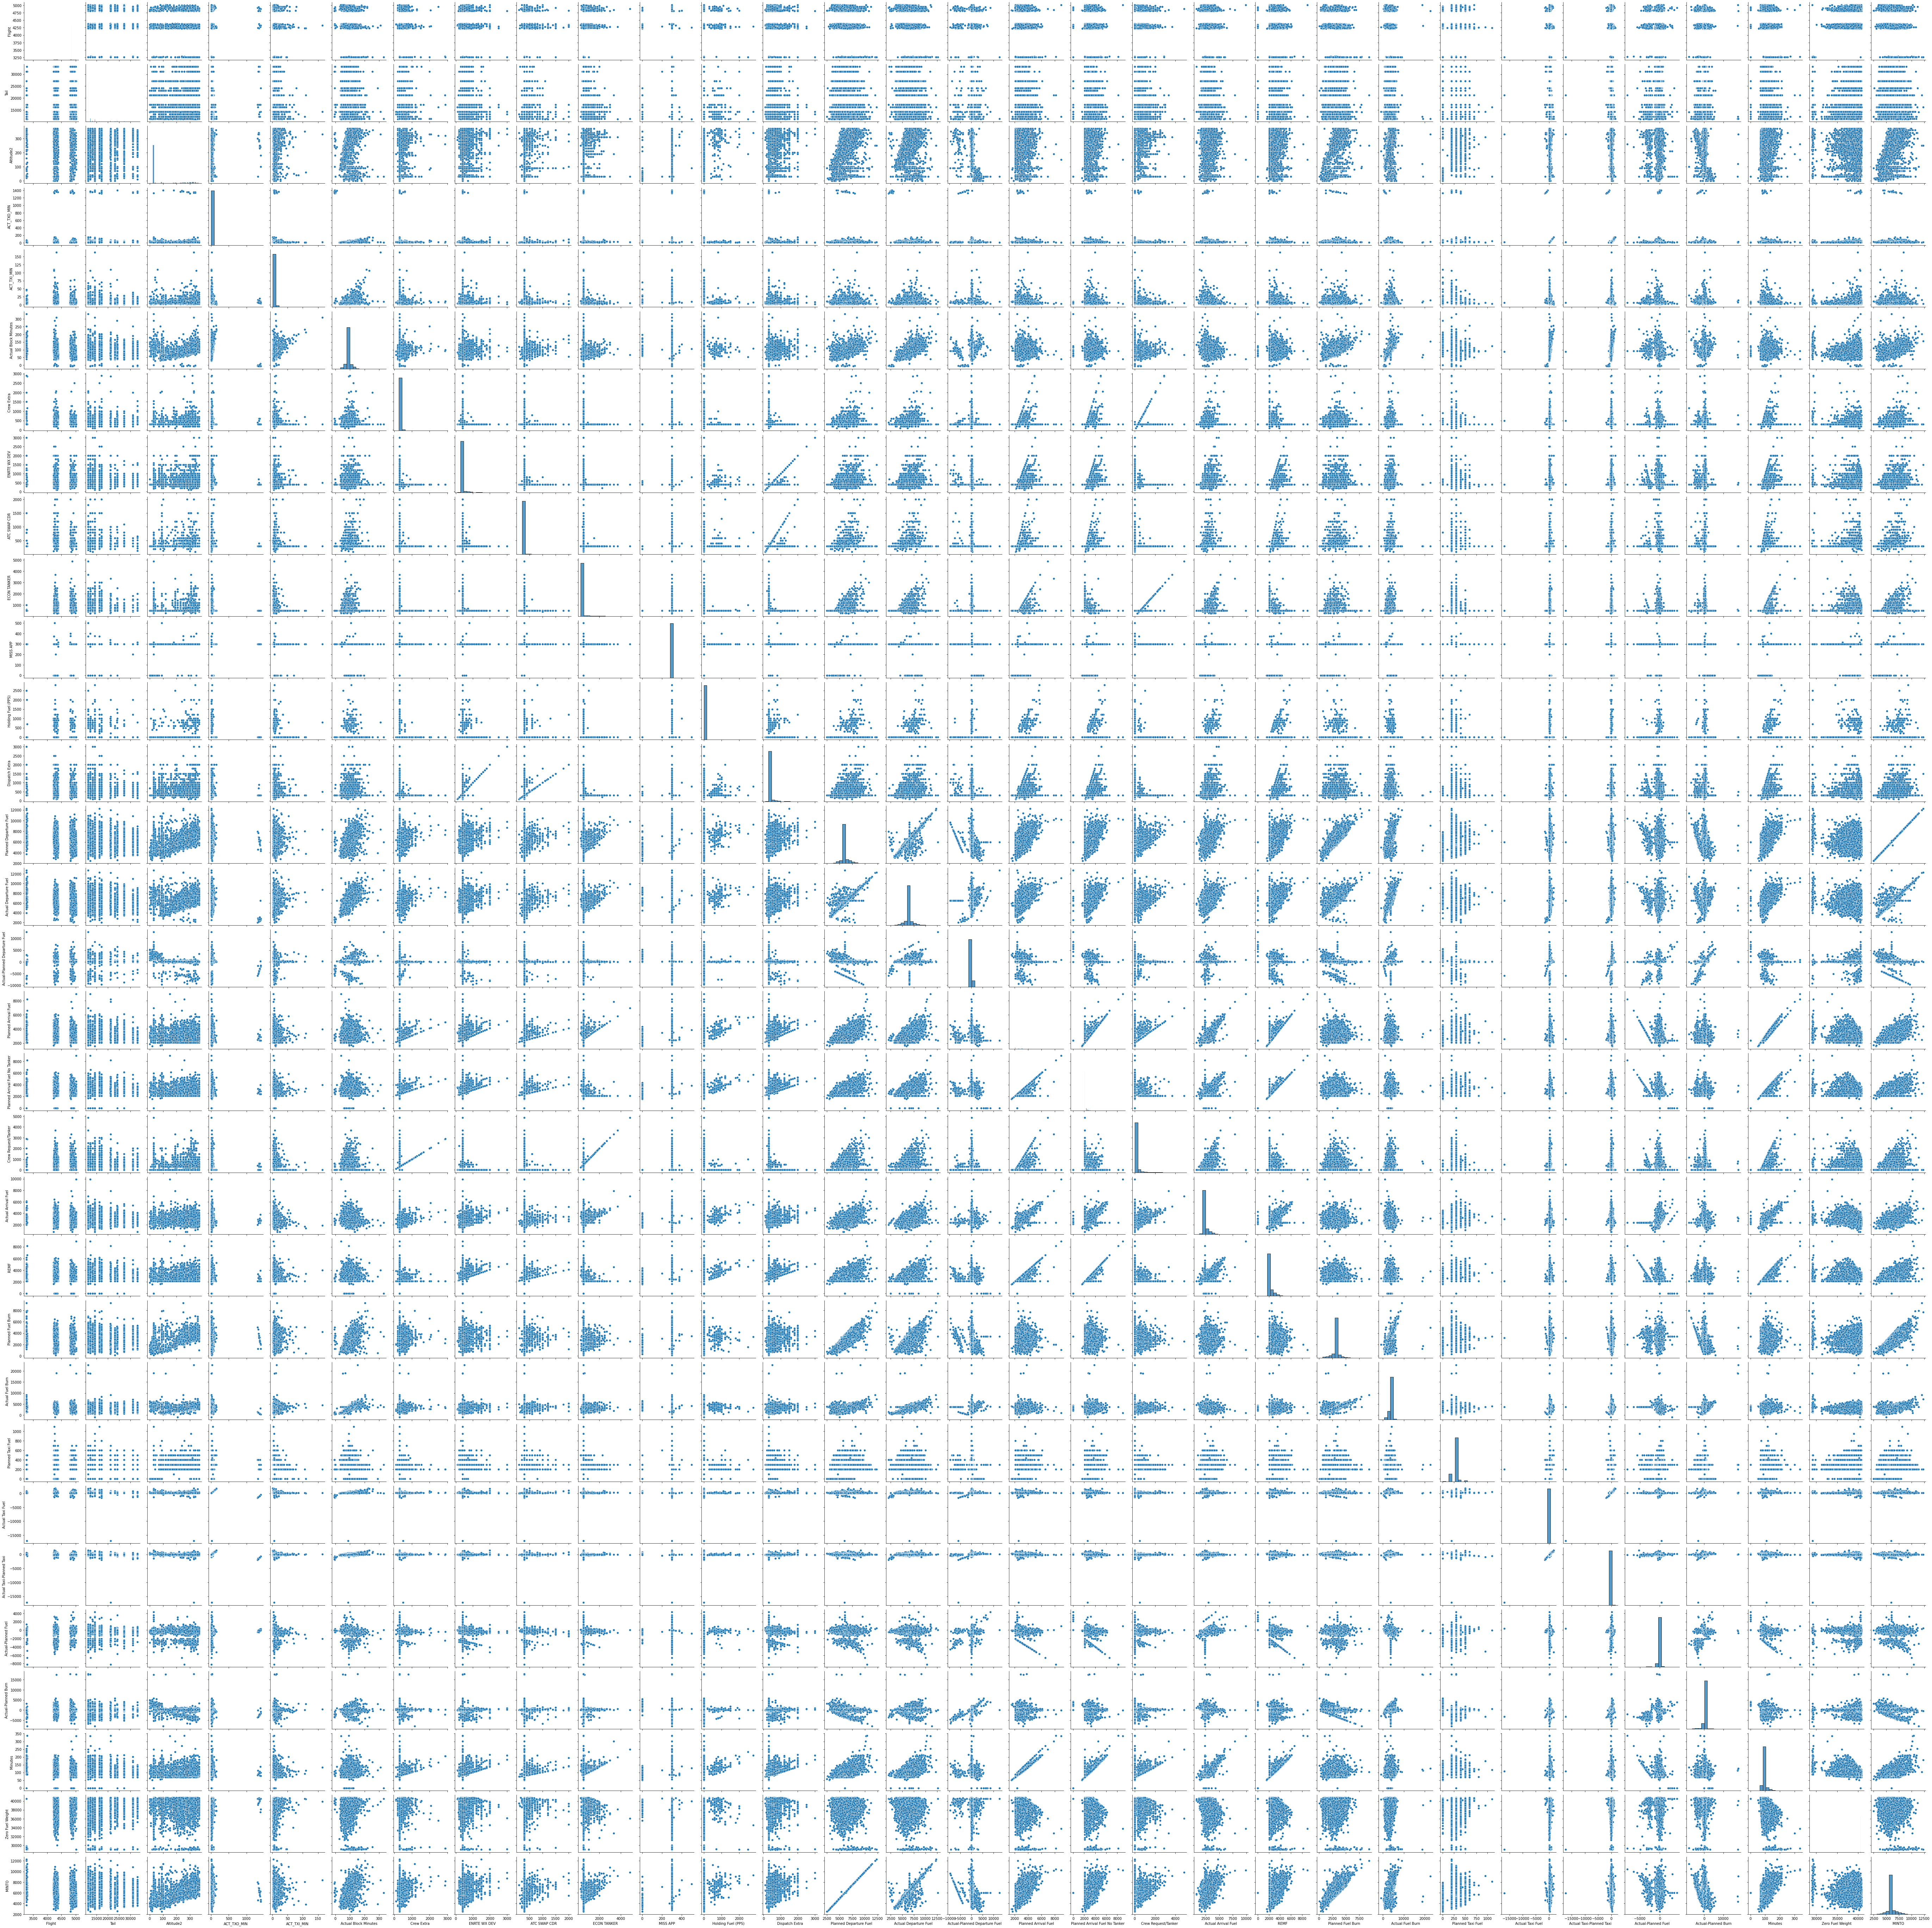

In [14]:
sns.pairplot(df_fuel)

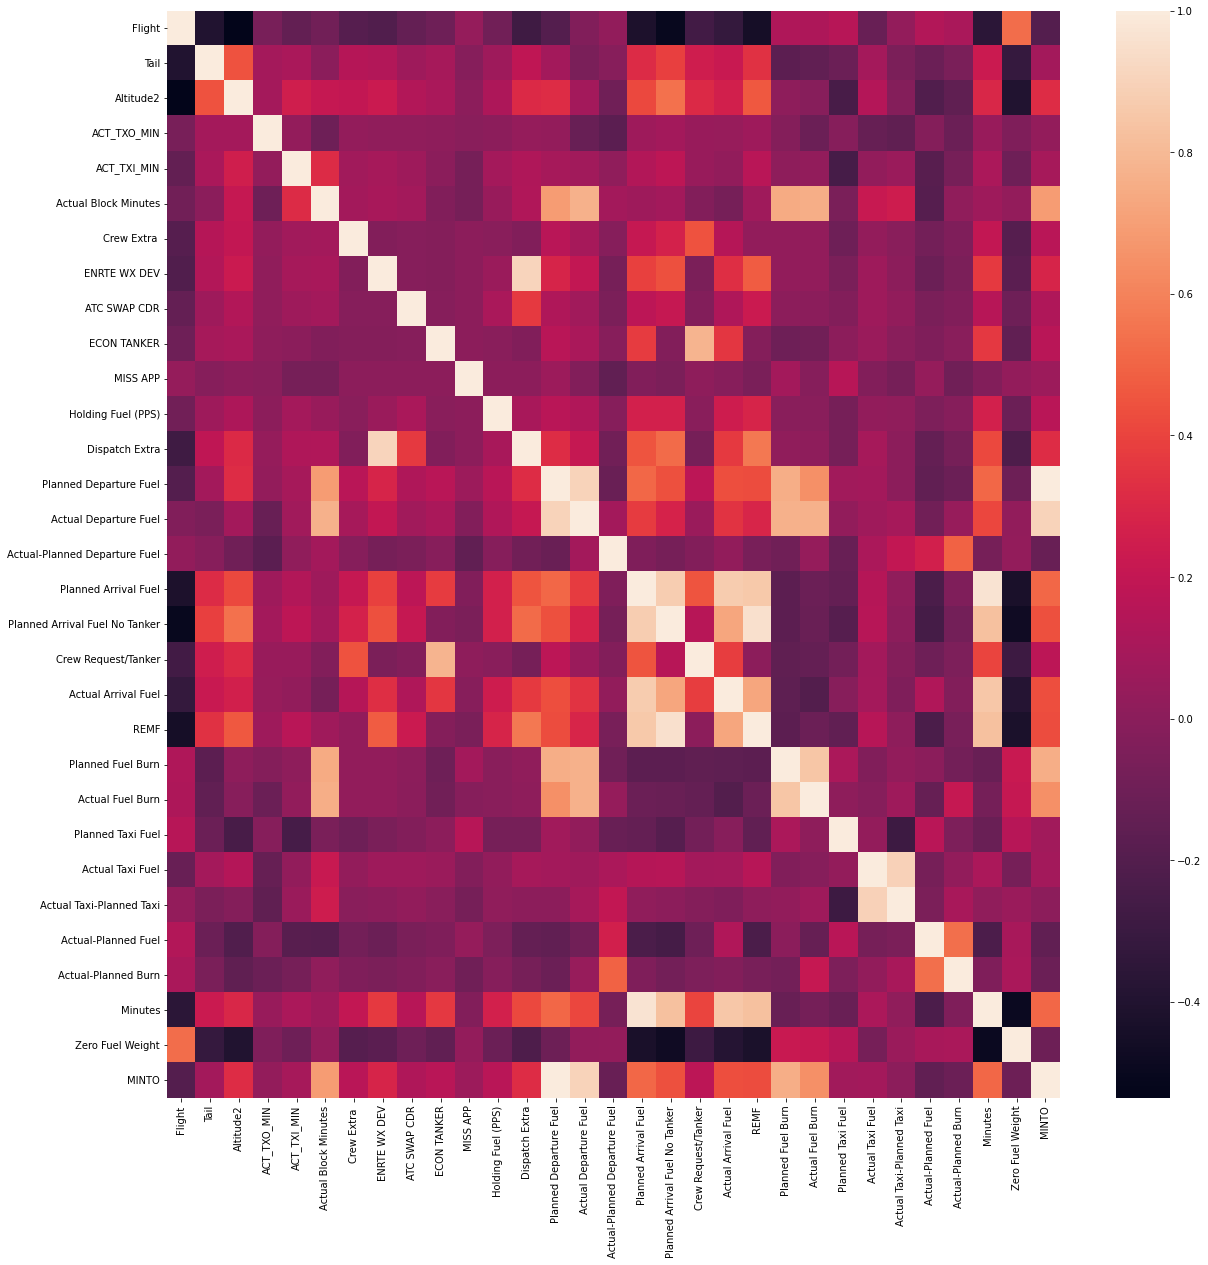

In [17]:
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(df_fuel.corr())